<a href="https://colab.research.google.com/github/edsonportosilva/ElectricCircuits/blob/master/Jupyter%20notebooks/Circuitos%20El%C3%A9tricos%20I%20-%20Semana%206.1%20-%20Indutores%20e%20acoplamento%20magn%C3%A9tico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
if 'google.colab' in str(get_ipython()):    
    ! git clone -b master https://github.com/edsonportosilva/ElectricCircuits
    from os import chdir as cd
    cd('/content/ElectricCircuits/')
    ! pip install -e .

In [2]:
from IPython.core.display import HTML

import sympy as sp
from sympy import oo
from circuit.utils import symplot, symdisp, round_expr
import numpy as np

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# *Circuitos Elétricos I - Semana 6*

### Problema 1
  
Para o circuito abaixo, tem-se que $v(t)=-1800te^{-20t}$ para $t\geq0$ e $i_1(0)=4\;A$ e $i_2(0)=-16\;A$

a) Determine $i_1(t)$ e $i_2(t)$ para $t\geq0$.\
b) Determine a energia fornecida à fonte de tensão no intervalo $0\leq t \leq\infty$.\
c) Determine a energia inicial armazenada nos indutores.\
d) Determine a energia final armazenada nos indutores.

<img src="https://github.com/edsonportosilva/ElectricCircuits/blob/master/Jupyter%20notebooks/figures/J8C1.png?raw=1" width="500">

In [3]:
# define as variáveis 
t = sp.symbols('t', real=True)

# expressão para a tensão v(t)
v = -1800*t*sp.exp(-20*t)

symdisp('v(t) = ', v, 'V')

<IPython.core.display.Math object>

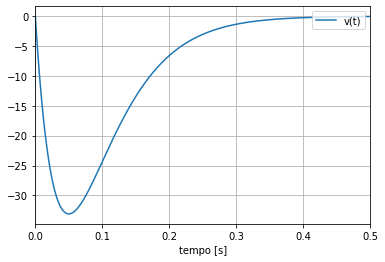

In [4]:
tmax = 0.5
intervalo = np.linspace(0, tmax, num=1000)
symplot(t, v, intervalo, funLabel= 'v(t)')

In [5]:
# valores das indutâncias
L1 = 10
L2 = 30

# valores iniciais das correntes nos indutores
i1_0 = 4
i2_0 = -16

#i1_0 = 1
#i2_0 = 2

In [6]:
# correntes nos indutores em função da tensão aplicada aos terminais
i1 = -(1/L1)*sp.integrate(v, (t, 0, t)) + i1_0
i2 = -(1/L2)*sp.integrate(v, (t, 0, t)) + i2_0

print('Correntes nos indutores:')
symdisp('i_1(t) = ', round_expr(i1, 2) , ' A')
symdisp('i_2(t) = ', round_expr(i2, 2) , ' A')

Correntes nos indutores:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

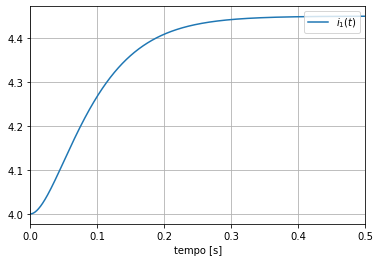

In [7]:
tmax = 0.5
intervalo = np.linspace(0, tmax, num=1000)
symplot(t, i1, intervalo, funLabel= '$i_1(t)$')

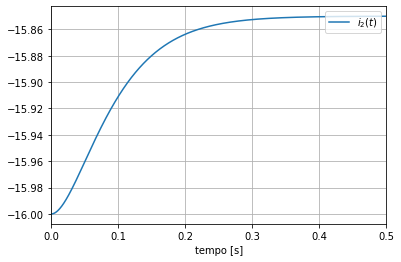

In [8]:
symplot(t, i2, intervalo, funLabel= '$i_2(t)$')

In [9]:
# LKC
i = i1 + i2

# potência desenvolvida pela fonte
p = v*i

symdisp('p(t) = ', round_expr(p.simplify(),2), 'W')

<IPython.core.display.Math object>

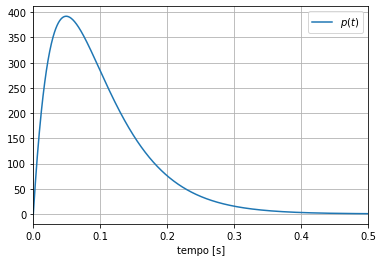

In [10]:
symplot(t, p, intervalo, funLabel= '$p(t)$')

In [11]:
# energia entrege à fonte
E = sp.integrate(p, (t, 0, oo))

print('Energia entrege à fonte quando t tende a infinito:')
symdisp('E = ', E, 'J')

Energia entrege à fonte quando t tende a infinito:


<IPython.core.display.Math object>

In [12]:
# calculando os valores de energia em t=0

E1_0 = (1/2)*L1*(i1.evalf(subs={t:0}))**2
E2_0 = (1/2)*L2*(i2.evalf(subs={t:0}))**2

print('Energia inicial armazenada nos indutores:')
symdisp('E_1(0) = ', E1_0, 'J')
symdisp('E_2(0) = ', E2_0, 'J')

Energia inicial armazenada nos indutores:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [13]:
# calculando os valores de energia em t =oo

E1_inf = (1/2)*L1*(i1.evalf(subs={t:100}))**2
E2_inf = (1/2)*L2*(i2.evalf(subs={t:100}))**2

print('Energia final armazenada nos indutores:')
symdisp('E_1(\infty) = ', round_expr(E1_inf, 2), 'J')
symdisp('E_2(\infty) = ', round_expr(E2_inf, 2), 'J')

Energia final armazenada nos indutores:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [14]:
# calculando a variação de energia nos indutores

ΔE = (E1_inf-E1_0) + (E2_inf-E2_0)

print('Variação da energia armazenada nos indutores:')
symdisp('ΔE = ', round_expr(ΔE,2), 'J')

Variação da energia armazenada nos indutores:


<IPython.core.display.Math object>

### Problema 2

Obtendo expressões para as indutâncias equivalentes em circuitos com acoplamento magnético

<img src="https://github.com/edsonportosilva/ElectricCircuits/blob/master/Jupyter%20notebooks/figures/J8C2.png?raw=1" width="700">

#### Associação em paralelo

$$
\begin{aligned}
&v_L = L_{1} \frac{d i_{1}}{d t}+M \frac{d i_{2}}{d t}\\
&v_L = L_{2} \frac{d i_{2}}{d t}+M \frac{d i_{1}}{d t}
\end{aligned}
$$

#### Definindo as equações do circuito na forma matricial

In [15]:
L1, L2, M, vL, t = sp.symbols('L_1, L_2, M, v_L, t', real=True)

In [16]:
# define a variável tempo 
t = sp.symbols('t', real=True)

# define as indutâncias
L1, L2, M = sp.symbols('L_1, L_2, M', real=True, positive=True)

# define as correntes i1 e i2
i1 = sp.Function('i_1')(t)
i2 = sp.Function('i_2')(t)

# define a tensão vL
vL = sp.Function('v_L')(t)

# define as equações do circuito no formato matricial
A  = sp.Matrix([[L1, -M],[-M, L2]])
V  = sp.Matrix([[vL],[vL]])

I  = sp.Matrix([[i1],[i2]])
dI = sp.diff(I, t)

symdisp('A = ', A)
symdisp('V = ', V)
symdisp(r'\frac{dI}{dt} = ', dI)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Equação da tensão em função das correntes na forma matricial

In [17]:
sp.Eq(V, A*dI)

Eq(Matrix([
[v_L(t)],
[v_L(t)]]), Matrix([
[L_1*Derivative(i_1(t), t) - M*Derivative(i_2(t), t)],
[L_2*Derivative(i_2(t), t) - M*Derivative(i_1(t), t)]]))

#### Determinado a inversa da matriz de indutâncias $A$

In [18]:
# matriz inversa de A
symdisp('A^{-1} = ' , A**-1)

<IPython.core.display.Math object>

#### Determinando o vetor de derivadas das correntes

In [19]:
# calcula o vetor de derivadas das correntes
dI = (A**-1)*V

dI.simplify()

symdisp(r'\frac{dI}{dt} = ', dI)

<IPython.core.display.Math object>

#### LKC

In [20]:
# di0/dt = di1/dt + di2/dt
dI0 = dI[0] + dI[1]

symdisp(r'\frac{di_0}{dt} = \frac{di_1}{dt} + \frac{di_2}{dt} =  ', dI0)

<IPython.core.display.Math object>

#### Obtendo a expressão para a indutância equivalente

In [21]:
# indutância equivalente: vL = Leq*di0/dt -> Leq = vL/di0/dt
Leq = vL/dI0

symdisp('L_{eq} = ', Leq.simplify())

<IPython.core.display.Math object>

Exemplos de circuitos com indutância mútua:

Em paralelo: https://tinyurl.com/y9zo85wm \
Em série: https://tinyurl.com/y7jrvv2y